In [1]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import nltk

In [4]:
# 5개 파일 한꺼번에 불러오기, "asterisk" 사용
interior = glob.glob("./mbti_x_interior_data_list/my*.xls")
interior

['./mbti_x_interior_data_list/myCabinetExcelData (4).xls',
 './mbti_x_interior_data_list/myCabinetExcelData (2).xls',
 './mbti_x_interior_data_list/myCabinetExcelData (3).xls',
 './mbti_x_interior_data_list/myCabinetExcelData (1).xls',
 './mbti_x_interior_data_list/myCabinetExcelData.xls']

In [7]:
# 저장할 리스트 생성
interior_data = []

# 5개 파일의 100개씩, 57개의 rows
for file in interior:
    df = pd.read_excel(file)
#     print(df)
    interior_data.append(df)
print(len(interior_data))

5


In [8]:
interior_data

[    Unnamed: 0  번호                                                 제목  \
 0          NaN   1  MBTI&reg; Personality Preferences and Diverse ...   
 1          NaN   2  MBTI&reg; and Interlibrary Loan Personnel in a...   
 2          NaN   3  Negative: The MBTI: Not Ready for Routine Use ...   
 3          NaN   4  TDI versus MBTI&reg;: A further reply to Roy C...   
 4          NaN   5  TDI versus MBTI&reg;: Roy Childs replies to Ro...   
 5          NaN   6    Applying the MBTI&reg; to Hospitality Education   
 6          NaN   7           Coaching with 360 and MBTI: A case study   
 7          NaN   8  Exploring the conceptual relationship between ...   
 8          NaN   9                           MBTI and Historical Data   
 9          NaN  10  MBTI Personality Types and Academic Achievemen...   
 10         NaN  11  MBTI personality type and other factors that r...   
 11         NaN  12  MBTI Personality Types of Project Managers and...   
 12         NaN  13  Using MBTI type t

In [9]:
# 데이터프레임 병합
interior_data_concat = pd.concat(interior_data, axis=0, ignore_index=True)
interior_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,MBTI&reg; Personality Preferences and Diverse ...,"Russell, A. L.",INTERNATIONAL ASSOCIATION OF SCHOOL LIBRARIANSHIP,2002
1,NaN,2,MBTI&reg; and Interlibrary Loan Personnel in a...,"Wright, A. J.","HAWORTH PRESS, INC.",2002
2,NaN,3,Negative: The MBTI: Not Ready for Routine Use ...,"Healy, Charles C.",American Association for Counseling and Develo...,1989
3,NaN,4,TDI versus MBTI&reg;: A further reply to Roy C...,"Bayne, R.",BRITISH PSYCHOLOGICAL SOCIETY,2005
4,NaN,5,TDI versus MBTI&reg;: Roy Childs replies to Ro...,"Childs, R.",BRITISH PSYCHOLOGICAL SOCIETY,2005
...,...,...,...,...,...,...
452,NaN,96,"Tyttenhanger house, Herts / Interior Design : ...","Spence, Sir Basil",unknown,1974
453,NaN,97,"Flat, Kensington / Interior designer : Susanne...","Garry, Susanne",unknown,1975
454,NaN,98,Interior design international review,unknown,unknown,1983
455,NaN,99,"Debenham's health club, London / Interior desi...",unknown,unknown,1975


In [11]:
project_title = interior_data_concat['제목']
project_title

0      MBTI&reg; Personality Preferences and Diverse ...
1      MBTI&reg; and Interlibrary Loan Personnel in a...
2      Negative: The MBTI: Not Ready for Routine Use ...
3      TDI versus MBTI&reg;: A further reply to Roy C...
4      TDI versus MBTI&reg;: Roy Childs replies to Ro...
                             ...                        
452    Tyttenhanger house, Herts / Interior Design : ...
453    Flat, Kensington / Interior designer : Susanne...
454                 Interior design international review
455    Debenham's health club, London / Interior desi...
456    Interior Design Identity in the Crossfire: A C...
Name: 제목, Length: 457, dtype: object

In [12]:
stopwords = set(stopwords.words("english")) # 영문만 찾아주는 stopwords 객체 생성
lemma = WordNetLemmatizer() # 의미있는 단어(표제어) 추출 객체 생성

In [15]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [16]:
lemma

<WordNetLemmatizer>

In [17]:
words = []

In [41]:
for title in project_title:    
#     print(title)
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) # 정규식으로 특수문자 제거
#     print(EnWords[:10])
    EnWordsToken = word_tokenize(EnWords.lower()) # 소문자로 만들어서 단어단위 토큰화
#     print(EnWordsToken[:10])
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopwords] # 단어단위토큰 중에서 stopwords에 없는 단어들
#     print(EnWordsTokenStop[:10])
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] # 표제어 추출
#     print(EnWordsTokenStopLemma[:10])
    words.append(EnWordsTokenStopLemma)

In [43]:
# 단어추출: 2D list
words[:10]

[['mbti',
  'reg',
  'personality',
  'preference',
  'diverse',
  'online',
  'learning',
  'experience'],
 ['mbti',
  'reg',
  'interlibrary',
  'loan',
  'personnel',
  'small',
  'sampling',
  'alabama',
  'academic',
  'library'],
 ['negative', 'mbti', 'ready', 'routine', 'use', 'counseling'],
 ['tdi', 'versus', 'mbti', 'reg', 'reply', 'roy', 'child'],
 ['tdi', 'versus', 'mbti', 'reg', 'roy', 'child', 'reply', 'rowan', 'bayne'],
 ['applying', 'mbti', 'reg', 'hospitality', 'education'],
 ['coaching', 'mbti', 'case', 'study'],
 ['exploring',
  'conceptual',
  'relationship',
  'emotional',
  'intelligence',
  'extraversion',
  'introversion',
  'dimension',
  'mbti',
  'role',
  'dominant',
  'auxiliary',
  'function'],
 ['mbti', 'historical', 'data'],
 ['mbti',
  'personality',
  'type',
  'academic',
  'achievement',
  'pupil',
  'teacher']]

In [46]:
# 2D list => 1D list by "reduce"
words2 = reduce(lambda x, y: x + y, words) # x: 원래 있던것, y: 새로 들어올 것 => append
# reduce: reduce(a, b) => b를 가져와서 a함수로 reduce
print(type(words2[:10]))
words2[:10]

<class 'list'>


['mbti',
 'reg',
 'personality',
 'preference',
 'diverse',
 'online',
 'learning',
 'experience',
 'mbti',
 'reg']

In [63]:
# 단어 개수 Counter
count = Counter(words2)
print(type(count))
count.most_common(10)

<class 'collections.Counter'>


[('interior', 411),
 ('design', 176),
 ('designer', 71),
 ('mbti', 57),
 ('student', 25),
 ('london', 23),
 ('space', 23),
 ('education', 22),
 ('type', 21),
 ('new', 19)]

In [64]:
# "짝짓기": key:value로 정리하기 위한 dictionary 생성 => "dataframe으로도 정리 가능"
word_count = dict()

In [65]:
# 상위 50가지 tags를 dictionary에 tag:count로 정리
for tag, counts in count.most_common(50):
    if len(str(tag)) > 1: # 1글자인 단어 필터링
        word_count[tag] = counts
print(word_count)

{'interior': 411, 'design': 176, 'designer': 71, 'mbti': 57, 'student': 25, 'london': 23, 'space': 23, 'education': 22, 'type': 21, 'new': 19, 'study': 17, 'office': 16, 'international': 16, 'experience': 15, 'exploring': 14, 'implication': 14, 'structure': 14, 'project': 13, 'modern': 13, 'home': 13, 'learning': 12, 'environment': 12, 'history': 12, 'house': 12, 'hotel': 11, 'personality': 10, 'preference': 10, 'practice': 10, 'effect': 10, 'using': 9, 'style': 9, 'social': 9, 'process': 9, 'practitioner': 9, 'research': 9, 'architecture': 9, 'myers': 8, 'briggs': 8, 'indicator': 8, 'development': 8, 'creative': 8, 'service': 8, 'contemporary': 8, 'earth': 8, 'symposium': 8, 'associate': 8, 'technology': 8, 'art': 8, 'award': 8}


In [66]:
# interior, mbti, design, designer 제거
del word_count['interior']
del word_count['mbti']
del word_count['design']
del word_count['designer']

In [67]:
project_keys = list(word_count.keys())
project_values = list(word_count.values())

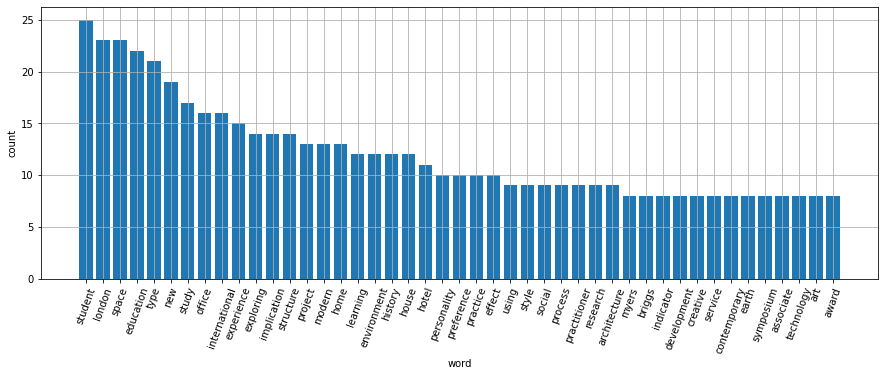

In [69]:
plt.figure(figsize=(15, 5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

plt.bar(range(len(word_count)), project_values, align='center')
plt.xticks(range(len(word_count)), project_keys, rotation='70')

plt.show()